## Import

In [ ]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
%reload_ext autoreload

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install -r requirements.txt
!pip install deepchem
!pip install rdkit
!pip install pycm
!pip install pytorch-lightning wandb rdkit ogb
!pip install torch_geometric
!pip install optuna
!pip install seaborn

ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import deepchem as dc
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from rdkit import Chem
from rdkit.Chem import Draw, rdFingerprintGenerator, AllChem
from rdkit.Chem.Descriptors import MolWt, TPSA, NumHDonors, NumHAcceptors
from rdkit.ML.Descriptors.MoleculeDescriptors import MolecularDescriptorCalculator

In [ ]:
df=pd.read_csv('/Users/suki/Chemoinformatics_project/data/raw/sider.csv')

In [ ]:
df.head()

,smiles,Hepatobiliary disorders,Metabolism and nutrition disorders,Product issues,Eye disorders,Investigations,Musculoskeletal and connective tissue disorders,Gastrointestinal disorders,Social circumstances,Immune system disorders,...,"Congenital, familial and genetic disorders",Infections and infestations,"Respiratory, thoracic and mediastinal disorders",Psychiatric disorders,Renal and urinary disorders,"Pregnancy, puerperium and perinatal conditions",Ear and labyrinth disorders,Cardiac disorders,Nervous system disorders,"Injury, poisoning and procedural complications"
0,C(CNCCNCCNCCN)N,1,1,0,0,1,1,1,0,0,...,0,0,1,1,0,0,1,1,1,0
1,CC(C)(C)C1=CC(=C(C=C1NC(=O)C2=CNC3=CC=CC=C3C2=...,0,1,0,0,1,1,1,0,0,...,0,1,1,0,0,0,1,0,1,0
2,CC[C@]12CC(=C)[C@H]3[C@H]([C@@H]1CC[C@]2(C#C)O...,0,1,0,1,1,0,1,0,1,...,0,0,0,1,0,0,0,0,1,0
3,CCC12CC(=C)C3C(C1CC[C@]2(C#C)O)CCC4=CC(=O)CCC34,1,1,0,1,1,1,1,0,1,...,1,1,1,1,1,1,0,0,1,1
4,C1C(C2=CC=CC=C2N(C3=CC=CC=C31)C(=O)N)O,1,1,0,1,1,1,1,0,1,...,0,1,1,1,0,0,1,0,1,0


## Pre-processing


Non-Numeric Columns (Categorical/Objects):
['smiles']


[20:54:38] WARNING: not removing hydrogen atom without neighbors
[20:54:38] WARNING: not removing hydrogen atom without neighbors
[20:54:38] WARNING: not removing hydrogen atom without neighbors
[20:54:38] WARNING: not removing hydrogen atom without neighbors
[20:54:38] WARNING: not removing hydrogen atom without neighbors
[20:54:38] WARNING: not removing hydrogen atom without neighbors
[20:54:38] WARNING: not removing hydrogen atom without neighbors
[20:54:38] WARNING: not removing hydrogen atom without neighbors
[20:54:38] WARNING: not removing hydrogen atom without neighbors
[20:54:38] WARNING: not removing hydrogen atom without neighbors
[20:54:38] WARNING: not removing hydrogen atom without neighbors
[20:54:38] WARNING: not removing hydrogen atom without neighbors
[20:54:38] WARNING: not removing hydrogen atom without neighbors



--- SIDER Preprocessing Report ---

Final dataset size: (1427, 29)



[20:54:38] WARNING: not removing hydrogen atom without neighbors
[20:54:38] WARNING: not removing hydrogen atom without neighbors
[20:54:38] WARNING: not removing hydrogen atom without neighbors
[20:54:38] WARNING: not removing hydrogen atom without neighbors
[20:54:38] WARNING: not removing hydrogen atom without neighbors
[20:54:38] WARNING: not removing hydrogen atom without neighbors
[20:54:38] WARNING: not removing hydrogen atom without neighbors
[20:54:38] WARNING: not removing hydrogen atom without neighbors
[20:54:38] WARNING: not removing hydrogen atom without neighbors
[20:54:38] WARNING: not removing hydrogen atom without neighbors
[20:54:38] WARNING: not removing hydrogen atom without neighbors
[20:54:38] WARNING: not removing hydrogen atom without neighbors
[20:54:38] WARNING: not removing hydrogen atom without neighbors


,canonical_smiles,Hepatobiliary disorders,Metabolism and nutrition disorders,Product issues,Eye disorders,Investigations,Musculoskeletal and connective tissue disorders,Gastrointestinal disorders,Social circumstances,Immune system disorders,...,Infections and infestations,"Respiratory, thoracic and mediastinal disorders",Psychiatric disorders,Renal and urinary disorders,"Pregnancy, puerperium and perinatal conditions",Ear and labyrinth disorders,Cardiac disorders,Nervous system disorders,"Injury, poisoning and procedural complications",Molecule
0,NCCNCCNCCNCCN,1,1,0,0,1,1,1,0,0,...,0,1,1,0,0,1,1,1,0,
1,CC(C)(C)c1cc(C(C)(C)C)c(NC(=O)c2c[nH]c3ccccc3c...,0,1,0,0,1,1,1,0,0,...,1,1,0,0,0,1,0,1,0,
2,C#C[C@]1(O)CC[C@H]2[C@@H]3CCC4=CCCC[C@@H]4[C@H...,0,1,0,1,1,0,1,0,1,...,0,0,1,0,0,0,0,1,0,
3,C#C[C@]1(O)CCC2C3CCC4=CC(=O)CCC4C3C(=C)CC21CC,1,1,0,1,1,1,1,0,1,...,1,1,1,1,1,0,0,1,1,
4,NC(=O)N1c2ccccc2CC(O)c2ccccc21,1,1,0,1,1,1,1,0,1,...,1,1,1,0,0,1,0,1,0,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1422,C[C@H]1CN(C[C@H](Cc2ccccc2)C(=O)NCC(=O)O)CC[C@...,0,1,0,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,
1423,CC[C@H]1OC(=O)[C@H](C)C(=O)[C@H](C)[C@@H](O[C@...,1,1,0,1,1,1,1,0,1,...,1,1,1,1,0,1,1,1,1,
1424,CCOc1ccc(Cc2cc([C@@H]3O[C@H](CO)[C@@H](O)[C@H]...,1,1,0,0,1,1,1,0,1,...,1,0,0,1,0,0,1,1,1,
1425,O=c1[nH]c2ccccc2n1C1CCN(CCCC(c2ccc(F)cc2)c2ccc...,0,1,0,1,1,1,1,0,0,...,0,0,1,1,0,0,1,1,1,

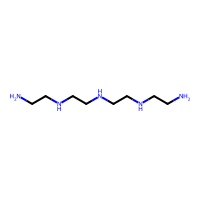
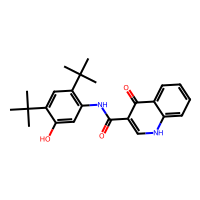
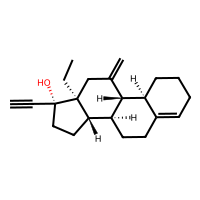
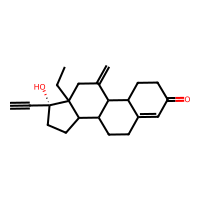
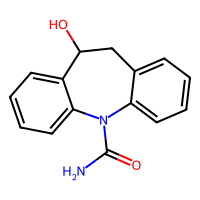
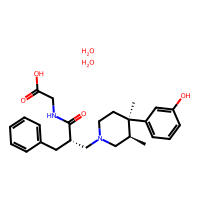
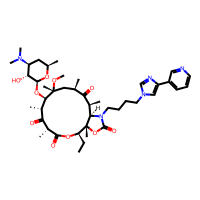
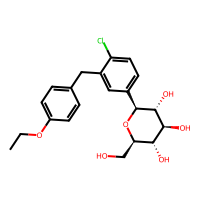
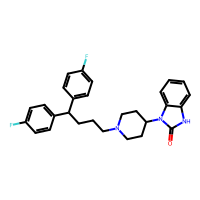
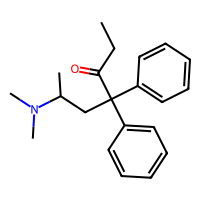

In [ ]:
from src.sider_preprocessing import sider_preprocessing

df_cleaned = sider_preprocessing(df)

## Featurizer

In [ ]:
from src.sider_featurizer import featurizer

#use rdkit_all=True to get all rdkit descriptors, false to get 7 of listed in the function

feature_dfs = featurizer(df=df_cleaned, methods=None, mol_col='Molecule',smiles='canonical_smiles', rdkit_all=True,fpSize=2048)

[22:44:49] WARNING: not removing hydrogen atom without neighbors
[22:44:49] WARNING: not removing hydrogen atom without neighbors
[22:44:49] WARNING: not removing hydrogen atom without neighbors
[22:44:49] WARNING: not removing hydrogen atom without neighbors
[22:44:53] WARNING: not removing hydrogen atom without neighbors
[22:44:53] WARNING: not removing hydrogen atom without neighbors
[22:44:53] WARNING: not removing hydrogen atom without neighbors
[22:44:53] WARNING: not removing hydrogen atom without neighbors
[22:44:53] WARNING: not removing hydrogen atom without neighbors
[22:44:53] WARNING: not removing hydrogen atom without neighbors
[22:44:53] WARNING: not removing hydrogen atom without neighbors
[22:44:53] WARNING: not removing hydrogen atom without neighbors
[22:44:53] WARNING: not removing hydrogen atom without neighbors
[22:44:53] WARNING: not removing hydrogen atom without neighbors
[22:44:53] WARNING: not removing hydrogen atom without neighbors
[22:44:53] WARNING: not r

df with RDKit features shape: (1427, 234)


[22:45:13] WARNING: not removing hydrogen atom without neighbors
[22:45:13] WARNING: not removing hydrogen atom without neighbors
[22:45:13] WARNING: not removing hydrogen atom without neighbors
[22:45:13] WARNING: not removing hydrogen atom without neighbors
[22:45:13] WARNING: not removing hydrogen atom without neighbors
[22:45:13] WARNING: not removing hydrogen atom without neighbors
[22:45:13] WARNING: not removing hydrogen atom without neighbors
[22:45:13] WARNING: not removing hydrogen atom without neighbors
[22:45:14] WARNING: not removing hydrogen atom without neighbors
[22:45:14] WARNING: not removing hydrogen atom without neighbors
[22:45:14] WARNING: not removing hydrogen atom without neighbors
[22:45:14] WARNING: not removing hydrogen atom without neighbors
[22:45:14] WARNING: not removing hydrogen atom without neighbors


df with MACCS features shape: (1427, 196)
df with Morgan Fingerprint features shape: (1427, 2078)


In [ ]:
feature_dfs.keys()

dict_keys(['rdkit', 'maccs', 'MorganFP'])

In [ ]:
concatenated_features_df = featurizer(df=df_cleaned, methods=None, mol_col='Molecule', fpSize=2048,concatenate=True)

[20:55:28] WARNING: not removing hydrogen atom without neighbors
[20:55:28] WARNING: not removing hydrogen atom without neighbors
[20:55:28] WARNING: not removing hydrogen atom without neighbors
[20:55:28] WARNING: not removing hydrogen atom without neighbors
[20:55:32] WARNING: not removing hydrogen atom without neighbors
[20:55:32] WARNING: not removing hydrogen atom without neighbors
[20:55:32] WARNING: not removing hydrogen atom without neighbors
[20:55:32] WARNING: not removing hydrogen atom without neighbors
[20:55:32] WARNING: not removing hydrogen atom without neighbors
[20:55:32] WARNING: not removing hydrogen atom without neighbors
[20:55:32] WARNING: not removing hydrogen atom without neighbors
[20:55:32] WARNING: not removing hydrogen atom without neighbors
[20:55:32] WARNING: not removing hydrogen atom without neighbors
[20:55:32] WARNING: not removing hydrogen atom without neighbors
[20:55:32] WARNING: not removing hydrogen atom without neighbors
[20:55:32] WARNING: not r

df with RDKit features shape: (1427, 234)


[20:55:52] WARNING: not removing hydrogen atom without neighbors
[20:55:52] WARNING: not removing hydrogen atom without neighbors
[20:55:52] WARNING: not removing hydrogen atom without neighbors
[20:55:52] WARNING: not removing hydrogen atom without neighbors
[20:55:52] WARNING: not removing hydrogen atom without neighbors
[20:55:52] WARNING: not removing hydrogen atom without neighbors
[20:55:52] WARNING: not removing hydrogen atom without neighbors
[20:55:52] WARNING: not removing hydrogen atom without neighbors
[20:55:53] WARNING: not removing hydrogen atom without neighbors
[20:55:53] WARNING: not removing hydrogen atom without neighbors
[20:55:53] WARNING: not removing hydrogen atom without neighbors
[20:55:53] WARNING: not removing hydrogen atom without neighbors
[20:55:53] WARNING: not removing hydrogen atom without neighbors


df with MACCS features shape: (1427, 196)
df with Morgan Fingerprint features shape: (1427, 2078)
Feature engineering complete. Final DataFrame shape: (1427, 2450)
Total features added: 217 rdkit +167 Maccs +2048 Morgan


In [ ]:
concatenated_features_df.isnull().sum().sum()

np.int64(0)

In [ ]:
concatenated_features_df.loc[concatenated_features_df.isna().any(axis=1)]

,canonical_smiles,Hepatobiliary disorders,Metabolism and nutrition disorders,Product issues,Eye disorders,Investigations,Musculoskeletal and connective tissue disorders,Gastrointestinal disorders,Social circumstances,Immune system disorders,...,Morgan_2038,Morgan_2039,Morgan_2040,Morgan_2041,Morgan_2042,Morgan_2043,Morgan_2044,Morgan_2045,Morgan_2046,Morgan_2047


In [ ]:
concatenated_features_df.iloc[:,:29]

,canonical_smiles,Hepatobiliary disorders,Metabolism and nutrition disorders,Product issues,Eye disorders,Investigations,Musculoskeletal and connective tissue disorders,Gastrointestinal disorders,Social circumstances,Immune system disorders,...,Infections and infestations,"Respiratory, thoracic and mediastinal disorders",Psychiatric disorders,Renal and urinary disorders,"Pregnancy, puerperium and perinatal conditions",Ear and labyrinth disorders,Cardiac disorders,Nervous system disorders,"Injury, poisoning and procedural complications",Molecule
0,NCCNCCNCCNCCN,1,1,0,0,1,1,1,0,0,...,0,1,1,0,0,1,1,1,0,<rdkit.Chem.rdchem.Mol object at 0x17658fe60>
1,CC(C)(C)c1cc(C(C)(C)C)c(NC(=O)c2c[nH]c3ccccc3c...,0,1,0,0,1,1,1,0,0,...,1,1,0,0,0,1,0,1,0,<rdkit.Chem.rdchem.Mol object at 0x17659c3c0>
2,C#C[C@]1(O)CC[C@H]2[C@@H]3CCC4=CCCC[C@@H]4[C@H...,0,1,0,1,1,0,1,0,1,...,0,0,1,0,0,0,0,1,0,<rdkit.Chem.rdchem.Mol object at 0x17659c900>
3,C#C[C@]1(O)CCC2C3CCC4=CC(=O)CCC4C3C(=C)CC21CC,1,1,0,1,1,1,1,0,1,...,1,1,1,1,1,0,0,1,1,<rdkit.Chem.rdchem.Mol object at 0x1765bb7d0>
4,NC(=O)N1c2ccccc2CC(O)c2ccccc21,1,1,0,1,1,1,1,0,1,...,1,1,1,0,0,1,0,1,0,<rdkit.Chem.rdchem.Mol object at 0x1765bba00>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1422,C[C@H]1CN(C[C@H](Cc2ccccc2)C(=O)NCC(=O)O)CC[C@...,0,1,0,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,<rdkit.Chem.rdchem.Mol object at 0x1765ee9d0>
1423,CC[C@H]1OC(=O)[C@H](C)C(=O)[C@H](C)[C@@H](O[C@...,1,1,0,1,1,1,1,0,1,...,1,1,1,1,0,1,1,1,1,<rdkit.Chem.rdchem.Mol object at 0x1765eea40>
1424,CCOc1ccc(Cc2cc([C@@H]3O[C@H](CO)[C@@H](O)[C@H]...,1,1,0,0,1,1,1,0,1,...,1,0,0,1,0,0,1,1,1,<rdkit.Chem.rdchem.Mol object at 0x1765eeab0>
1425,O=c1[nH]c2ccccc2n1C1CCN(CCCC(c2ccc(F)cc2)c2ccc...,0,1,0,1,1,1,1,0,0,...,0,0,1,1,0,0,1,1,1,<rdkit.Chem.rdchem.Mol object at 0x1765eeb20>


In [ ]:
concatenated_features_df.columns.get_loc('Molecule')

28

In [ ]:
concatenated_features_df.isna().sum().sum()

np.int64(0)

In [ ]:
concatenated_features_df.columns.get_loc('Molecule')

28

## Models

In [ ]:
from src import sider_baseline_models
results_dict = {}
for feat_name, df_feat in feature_dfs.items():

    X = df_feat.iloc[:, 29:].copy()
    y = df_feat.iloc[:, 1:28]

    X = X.select_dtypes(include=np.number)
    print(X.dtypes)

    # Apply VarianceThreshold to remove zero-variance features
    """selector = VarianceThreshold(threshold=0.0)
    X_cleaned_array = selector.fit_transform(X)
    X = pd.DataFrame(X_cleaned_array, columns=X.columns[selector.get_support()])"""

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    #results_df, trained_models = sider_baseline_models.train_and_evaluate_models(X_train, X_test, y_train, y_test, feat_name)
    results_dict[feat_name]=sider_baseline_models.train_and_evaluate_models(X_train, X_test, y_train, y_test, feat_name)



MACCS_0      float64
MACCS_9      float64
MACCS_10     float64
MACCS_11     float64
MACCS_12     float64
              ...   
MACCS_212    float64
MACCS_213    float64
MACCS_214    float64
MACCS_215    float64
MACCS_216    float64
Length: 205, dtype: object
Applied StandardScaler (continuous features detected).

--- Hyperparameter search: Random Forest... ---
RF - Best Hyperparameters: {'estimator__max_depth': 10, 'estimator__n_estimators': 100}

--- Hyperparameter search: XGBoost ---


[20:59:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

[20:59:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

[20:59:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

[20:59:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

[20:59:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

[20:59:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

[20:59:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

[20:59:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" }

XGb - Best Hyperparameters: {'estimator__max_depth': 15, 'estimator__n_estimators': 100}

--- Hyperparameter search: Logistic Regression ---
Logistic Regression - Best Hyperparameters: {'estimator__C': 0.1}

--- Hyperparameter search: SVM ---
SVM - Best Hyperparameters: {'estimator__C': 1.0}


--- EVALUATION AND RESULTS COLLECTION ---

                     MODEL PERFORMANCE SUMMARY
                     Features: rdkit
                    Features Macro AUC-ROC                                               Hyperparameters
Random Forest          rdkit        0.6331  {'estimator__max_depth': 10, 'estimator__n_estimators': 100}
XGBoost                rdkit        0.6213                                                      Defaults
Logistic Regression    rdkit        0.6121                             C=1.0 (Default), Solver=liblinear
SVM                    rdkit        0.6107                                Kernel=linear, C=1.0 (Default)

--- TOP 5 LABELS ---
                               

[21:11:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

[21:11:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

[21:11:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

[21:11:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

[21:11:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

[21:11:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

[21:11:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

[21:11:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" }

XGb - Best Hyperparameters: {'estimator__max_depth': 5, 'estimator__n_estimators': 50}

--- Hyperparameter search: Logistic Regression ---
Logistic Regression - Best Hyperparameters: {'estimator__C': 0.1}

--- Hyperparameter search: SVM ---
SVM - Best Hyperparameters: {'estimator__C': 0.1}


--- EVALUATION AND RESULTS COLLECTION ---

                     MODEL PERFORMANCE SUMMARY
                     Features: maccs
                    Features Macro AUC-ROC                                               Hyperparameters
Random Forest          maccs        0.6396  {'estimator__max_depth': 10, 'estimator__n_estimators': 300}
XGBoost                maccs        0.6301                                                      Defaults
Logistic Regression    maccs        0.6102                             C=1.0 (Default), Solver=liblinear
SVM                    maccs        0.5979                                Kernel=linear, C=1.0 (Default)

--- TOP 5 LABELS ---
                               La

[21:17:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

[21:17:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

[21:17:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

[21:17:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

[21:17:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

[21:17:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

[21:17:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

[21:17:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" }

XGb - Best Hyperparameters: {'estimator__max_depth': 20, 'estimator__n_estimators': 50}

--- Hyperparameter search: Logistic Regression ---
Logistic Regression - Best Hyperparameters: {'estimator__C': 0.1}

--- Hyperparameter search: SVM ---
SVM - Best Hyperparameters: {'estimator__C': 0.1}


--- EVALUATION AND RESULTS COLLECTION ---

                     MODEL PERFORMANCE SUMMARY
                     Features: MorganFP
                     Features Macro AUC-ROC                                               Hyperparameters
XGBoost              MorganFP        0.6480                                                      Defaults
Logistic Regression  MorganFP        0.6454                             C=1.0 (Default), Solver=liblinear
Random Forest        MorganFP        0.6436  {'estimator__max_depth': 25, 'estimator__n_estimators': 200}
SVM                  MorganFP        0.6238                                Kernel=linear, C=1.0 (Default)

--- TOP 5 LABELS ---
                        

In [ ]:
from src import sider_baseline_models

In [ ]:
from sklearn.feature_selection import VarianceThreshold

#running 10 flod cross-validation for all feature sets

cv_results_dict = {}

for feat_name, df_feat in feature_dfs.items():
    print("\n" + "="*100)
    print(f"Running 10-fold cross-validation for feature set: {feat_name}")
    print("="*100)

    # --- Prepare feature matrix (X) and multi-label target (y) ---
    X = df_feat.iloc[:, 29:].copy()
    y = df_feat.iloc[:, 1:28]

    # Keep only numeric columns
    X = X.select_dtypes(include=np.number)
    print(f"\nNumeric feature columns detected: {X.shape[1]}")

    # Optional: remove zero-variance features
    selector = VarianceThreshold(threshold=0.0)
    X_cleaned_array = selector.fit_transform(X)
    X = pd.DataFrame(X_cleaned_array, columns=X.columns[selector.get_support()])

    print(f"After VarianceThreshold: {X.shape[1]} features remain.")

    # --- Run 10-Fold CV pipeline ---
    results = sider_baseline_models.cross_validate_multilabel_models(X, y, feat=feat_name, verbose=True, n_splits=10)
    cv_results_dict[feat_name] = results

print("\n\n==================== ALL FEATURE SETS COMPLETED ====================")



Running 10-fold cross-validation for feature set: rdkit

Numeric feature columns detected: 205
After VarianceThreshold: 199 features remain.

============================== FOLD 1/10 ==============================
Applied StandardScaler (continuous features detected).

============================== FOLD 2/10 ==============================
Applied StandardScaler (continuous features detected).

============================== FOLD 3/10 ==============================
Applied StandardScaler (continuous features detected).

============================== FOLD 4/10 ==============================
Applied StandardScaler (continuous features detected).

============================== FOLD 5/10 ==============================
Applied StandardScaler (continuous features detected).

============================== FOLD 6/10 ==============================
Applied StandardScaler (continuous features detected).

============================== FOLD 7/10 ==============================
Applied StandardS

##UMAP

In [ ]:
X_all_features= concatenated_features_df.iloc[:, 29:].copy()
y_all_features = concatenated_features_df.iloc[:, 1:28]

results_dict_all_features = {}

X_all_features = X_all_features.select_dtypes(include=np.number)
X_train_all_features, X_test_all_features, y_train_all_features, y_test_all_features = train_test_split(X_all_features, y_all_features, test_size=0.2, random_state=42)

#results_df, trained_models = sider_baseline_models.train_and_evaluate_models(X_train, X_test, y_train, y_test, feat_name)
results_dict_all_features=sider_baseline_models.train_and_evaluate_models(X_train, X_test, y_train, y_test, feat='all_features')


Skipping scaling (binary features detected).

--- Hyperparameter search: Random Forest... ---
RF - Best Hyperparameters: {'estimator__max_depth': 25, 'estimator__n_estimators': 200}

--- Hyperparameter search: XGBoost ---


[22:17:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

[22:17:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

[22:17:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

[22:17:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

[22:17:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

[22:17:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

[22:17:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

[22:17:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" }

XGb - Best Hyperparameters: {'estimator__max_depth': 20, 'estimator__n_estimators': 50}

--- Hyperparameter search: Logistic Regression ---
Logistic Regression - Best Hyperparameters: {'estimator__C': 0.1}

--- Hyperparameter search: SVM ---
SVM - Best Hyperparameters: {'estimator__C': 0.1}


--- EVALUATION AND RESULTS COLLECTION ---

                     MODEL PERFORMANCE SUMMARY
                     Features: all_features
                         Features Macro AUC-ROC                                               Hyperparameters
XGBoost              all_features        0.6480                                                      Defaults
Logistic Regression  all_features        0.6454                             C=1.0 (Default), Solver=liblinear
Random Forest        all_features        0.6436  {'estimator__max_depth': 25, 'estimator__n_estimators': 200}
SVM                  all_features        0.6238                                Kernel=linear, C=1.0 (Default)

--- TOP 5 LABELS ---


In [ ]:
results_dict_all_features.keys()

dict_keys(['Random Forest', 'XGBoost', 'Logistic Regression', 'SVM', 'Summary', 'Detailed'])

In [ ]:
import joblib
import os

#pick XGboost model from trained models
trained_model= results_dict_all_features['XGBoost']

# Specify save path
save_dir = "saved_models/"
os.makedirs(save_dir, exist_ok=True)
save_path = os.path.join(save_dir, "XGBoost.joblib")

# Save SVM only
joblib.dump(trained_model, save_path)
print(f"XGBoost model saved to: {save_path}")


XGBoost model saved to: saved_models/XGBoost.joblib


##SVM Optimization

Optimizing the SVM with a Non-Linear Kernel
My baseline results showed a clear pattern: tree-based models like Random Forest (Macro AUC-ROC of 0.66) significantly outperformed the linear models like Logistic Regression and the linear SVM (around 0.61).

This strongly suggested that the relationship between the molecular features and the side effects is non-linear.

The UMAP visualizations confirmed this hypothesis. For well-predicted labels, the classes formed distinct, non-linear clusters that couldn't be separated by a simple line. This visual evidence provided a strong reason to explore a more complex, non-linear SVM.

Optimization Strategy
Based on this, I decided to optimize an SVM using the RBF kernel to see if it could match the performance of the tree-based models.

Since SVMs are very slow to train, I used RandomizedSearchCV instead of an exhaustive GridSearchCV. This is a more efficient way to explore a wide range of hyperparameters (C and gamma) in a reasonable amount of time. If I had more time, a next step would be to try a more advanced technique like Bayesian Optimization.

Practical Challenge: Runtime
However, I ran into a major practical issue: the runtime.

Because this is a multi-label problem, the OneVsRestClassifier has to train 27 separate SVMs. With RandomizedSearchCV configured for 8 iterations and 3-fold cross-validation, this meant training a total of 648 models (27 * 8 * 3).

This process was too slow for a standard notebook environment. It's also worth noting that scikit-learn's SVM is CPU-bound, meaning a GPU would not have helped speed up this specific task. This experience showed that while powerful, SVMs can be impractical for hyperparameter tuning on complex, multi-label datasets like this one.

In [ ]:
from src.sider_svm_optimization import optimize_svm

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

# RandomizedSearchCV on non RBF SVM
best_svm_model = optimize_svm(X_train_scaled, y_train)


--- Optimizing SVM with RandomizedSearchCV... ---
Fitting 10 folds for each of 8 candidates, totalling 80 fits
[CV] END estimator__C=10, estimator__gamma=0.001, estimator__kernel=linear; total time= 2.5min
[CV] END estimator__C=10, estimator__gamma=0.001, estimator__kernel=linear; total time= 2.5min
[CV] END estimator__C=10, estimator__gamma=0.001, estimator__kernel=linear; total time= 2.5min
[CV] END estimator__C=10, estimator__gamma=0.001, estimator__kernel=linear; total time= 2.5min
[CV] END estimator__C=10, estimator__gamma=0.001, estimator__kernel=linear; total time= 2.5min
[CV] END estimator__C=10, estimator__gamma=0.001, estimator__kernel=linear; total time= 2.6min
[CV] END estimator__C=10, estimator__gamma=0.001, estimator__kernel=linear; total time= 2.6min
[CV] END estimator__C=10, estimator__gamma=0.001, estimator__kernel=linear; total time= 2.6min
[CV] END estimator__C=10, estimator__gamma=0.001, estimator__kernel=linear; total time= 2.7min
[CV] END estimator__C=10, estimat